# Analyse Exploratoire des Données
## 1. Chargement et Prétraitement des Données

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Charger les données
data_path = "../data/raw/telecom_sales_data.csv"  # Chemin vers les données brutes
sales_data = pd.read_csv(data_path)
sales_data.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Aperçu des données
print("Aperçu des premières lignes :")
display(sales_data.head())

print("\nRésumé des colonnes :")
print(sales_data.info())

print("\nStatistiques descriptives :")
display(sales_data.describe(include='all'))

Aperçu des premières lignes :


,date,marketing_score,competition_index,customer_satisfaction,purchasing_power_index,weather_condition,tech_event,5g_phase,store_traffic,public_transport,city,jPhone_Pro_revenue,Kaggle_Pixel_5_revenue,Planet_SX_revenue
0,2019-01-01,100.00,50.00,85.0,120.00,Bad,NaN,Pre-5G,0.02,Hub,Paris,122182.54,68709.20,36032.11
1,2019-01-02,100.09,50.52,85.0,120.09,Good,NaN,Pre-5G,1.08,Good,Paris,146473.79,73935.56,44180.21
2,2019-01-03,100.18,51.04,85.0,120.17,Moderate,NaN,Pre-5G,-0.24,Limited,Paris,129647.90,75375.54,41112.52
3,2019-01-04,100.27,51.56,85.0,120.26,Moderate,NaN,Pre-5G,-0.13,Poor,Paris,137621.01,85213.00,46222.99
4,2019-01-05,100.36,52.08,85.0,120.34,Bad,NaN,Pre-5G,0.06,Limited,Paris,194936.87,89281.49,38312.08



Résumé des colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    17536 non-null  datetime64[ns]
 1   marketing_score         17273 non-null  float64       
 2   competition_index       17100 non-null  float64       
 3   customer_satisfaction   17370 non-null  float64       
 4   purchasing_power_index  17193 non-null  float64       
 5   weather_condition       17467 non-null  object        
 6   tech_event              66 non-null     object        
 7   5g_phase                17245 non-null  object        
 8   store_traffic           17390 non-null  float64       
 9   public_transport        17436 non-null  object        
 10  city                    17536 non-null  object        
 11  jPhone_Pro_revenue      16411 non-null  float64       
 12  Kaggle_Pixel_5_revenue 

,date,marketing_score,competition_index,customer_satisfaction,purchasing_power_index,weather_condition,tech_event,5g_phase,store_traffic,public_transport,city,jPhone_Pro_revenue,Kaggle_Pixel_5_revenue,Planet_SX_revenue
count,17536,17273.000000,17100.000000,17370.000000,17193.000000,17467,66,17245,17390.000000,17436,17536,16411.000000,16686.000000,16383.000000
unique,NaN,NaN,NaN,NaN,NaN,3,2,4,NaN,4,8,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Moderate,Major Launch,Mature-5G,NaN,Hub,Paris,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,7599,48,7583,NaN,8617,2192,NaN,NaN,NaN
mean,2021-12-31 12:00:00,88.737093,20.461446,72.279904,98.769151,NaN,NaN,NaN,0.195773,NaN,NaN,83883.185692,40562.879091,21856.485142
min,2019-01-01 00:00:00,40.900000,4.740000,48.960000,75.000000,NaN,NaN,NaN,-1.870000,NaN,NaN,0.000000,1576.180000,1066.710000
25%,2020-07-01 18:00:00,81.010000,11.440000,69.500000,91.130000,NaN,NaN,NaN,-0.170000,NaN,NaN,45667.030000,22463.780000,12326.065000
50%,2021-12-31 12:00:00,89.820000,16.870000,72.430000,97.490000,NaN,NaN,NaN,0.190000,NaN,NaN,70835.830000,33985.020000,18288.840000
75%,2023-07-02 06:00:00,98.290000,24.960000,76.740000,105.000000,NaN,NaN,NaN,0.570000,NaN,NaN,104172.560000,49957.430000,26803.965000
max,2024-12-31 00:00:00,126.810000,64.410000,89.770000,125.000000,NaN,NaN,NaN,2.660000,NaN,NaN,536859.730000,239736.500000,103250.710000


Suite au chargement des données, nous avons pris connaissance du jeu de données qui contient 14 colonnes et 17,536 lignes.
Parmi ces colonnes :

10 variables explicatives qui sont soit numériques, soit catégoriques. Elles incluent des indicateurs de performance marketing (marketing_score), des variables socio-économiques (purchasing_power_index, competition_index), des conditions environnementales (weather_condition) et des infrastructures (5g_phase, public_transport).
3 colonnes de revenus correspondant aux modèles de smartphones : jPhone_Pro_revenue, Kaggle_Pixel_5_revenue et Planet_SX_revenue.
À première vue, les revenus montrent des variations importantes, avec des valeurs allant de très faibles à des montants élevés, ce qui peut être lié à des pics de ventes ou à des spécificités locales.

## Traitement des Valeurs Manquantes : Colonnes Numériques et Revenus

Les valeurs manquantes des colonnes numériques (`marketing_score`, `competition_index`, `purchasing_power_index`, etc.) ainsi que des colonnes de revenus (`jPhone_Pro_revenue`, `Kaggle_Pixel_5_revenue`, `Planet_SX_revenue`) ont été imputées à l'aide d'une interpolation linéaire. 

### Pourquoi l'interpolation linéaire ?
1. Les données sont collectées de manière temporelle, et cette méthode permet de préserver les tendances naturelles entre deux points.
2. Cela minimise les biais potentiels dans les séries temporelles et assure la continuité des valeurs pour des analyses précises.
3. Elle est particulièrement adaptée aux colonnes de revenus pour éviter les discontinuités visibles dans les analyses ou les prévisions.

Une vérification a confirmé qu'aucune valeur manquante ne subsiste après le traitement."

In [5]:
# Identifier les colonnes avec des valeurs manquantes
missing_values = sales_data.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

# TRAITEMENT : Exemple d'interpolation pour des colonnes numériques
numeric_columns = ['marketing_score', 'competition_index', 'purchasing_power_index', 
                   'store_traffic', 'customer_satisfaction','jPhone_Pro_revenue', 'Kaggle_Pixel_5_revenue', 'Planet_SX_revenue']
#Ajout des valeurs manquantes par interpolation pour préserver les tendances temporelles
sales_data[numeric_columns] = sales_data[numeric_columns].interpolate(method='linear')

# Vérifier que les valeurs manquantes ont été corrigées
missing_values_after = sales_data.isnull().sum()
print("\nValeurs manquantes restantes après traitement :")
print(missing_values_after[missing_values_after > 0])

Valeurs manquantes par colonne :
marketing_score             263
competition_index           436
customer_satisfaction       166
purchasing_power_index      343
weather_condition            69
tech_event                17470
5g_phase                    291
store_traffic               146
public_transport            100
jPhone_Pro_revenue         1125
Kaggle_Pixel_5_revenue      850
Planet_SX_revenue          1153
dtype: int64

Valeurs manquantes restantes après traitement :
weather_condition       69
tech_event           17470
5g_phase               291
public_transport       100
dtype: int64


## Traitement des Valeurs Manquantes : Colonnes Catégoriques

Pour les colonnes catégoriques, une méthode adaptée à la nature temporelle des données a été utilisée afin de garantir une imputation cohérente :

- **Stratégie d'imputation** :
  - Les colonnes `weather_condition`, `5g_phase`, et `public_transport` ont été complétées en utilisant leur **valeur dominante (mode)** au sein de chaque groupe mensuel. Ce choix repose sur l’hypothèse que les conditions environnementales et les infrastructures varient peu à l’échelle d’un mois et que les données manquantes peuvent être estimées en se basant sur des tendances locales.

- **Pourquoi le mode par mois ?**  
  - L’imputation au niveau mensuel permet de capturer les variations éventuelles dans les catégories au fil du temps.
  - Par exemple, les phases de déploiement de la 5G (`5g_phase`) ou les conditions météorologiques (`weather_condition`) peuvent changer entre les mois mais restent relativement constantes au sein d’un mois donné.
  - Cette approche garantit une continuité dans les données sans introduire d’hypothèses arbitraires.

- **Non-traitement de la colonne `tech_event`** :
  - La colonne `tech_event` n’a pas été traitée car les **données sont trop rares**. Les occurrences de cette variable étant insuffisantes, il n’a pas été possible d'imputer des valeurs significatives sans risquer d’introduire un biais ou de fausser l’analyse.

### Code appliqué :
1. Une fonction spécifique a été utilisée pour calculer le mode au sein de chaque groupe mensuel et combler les valeurs manquantes dans les colonnes cibles (`weather_condition`, `public_transport`, `5g_phase`).
2. La colonne `month` a été dérivée de la colonne `date` pour faciliter l’imputation basée sur les groupes.

### Impact :
- Les valeurs manquantes des colonnes catégoriques principales ont été réduites grâce à cette stratégie.
- Cette méthode assure que les données catégoriques restent cohérentes et reflètent les tendances réelles observées.
- La colonne `tech_event`, bien que toujours incomplète, est conservée telle quelle afin de ne pas fausser les résultats.


In [6]:
# Fonction pour remplir les valeurs manquantes par le mode du groupe
def fill_by_group_mode(column, group_col):
    for group in sales_data[group_col].unique():
        mode_value = sales_data[sales_data[group_col] == group][column].mode()
        if not mode_value.empty:
            sales_data.loc[(sales_data[group_col] == group) & (sales_data[column].isnull()), column] = mode_value[0]

# Ajouter une colonne pour le mois
if 'date' in sales_data.columns:
    sales_data['month'] = sales_data['date'].dt.to_period('M')
else:
    print("La colonne 'date' n'existe pas dans le DataFrame.")

# Remplir les valeurs manquantes pour weather_condition, 5g_phase et public_transport par le mode du mois
fill_by_group_mode('weather_condition', 'month')
fill_by_group_mode('public_transport', 'month')
fill_by_group_mode('5g_phase', 'month')
# Vérifier si les valeurs manquantes ont été traitées
print('Valeurs manquantes après traitement :\n', sales_data[['5g_phase', 'weather_condition', 'public_transport']].isnull().sum())

Valeurs manquantes après traitement :
 5g_phase             0
weather_condition    0
public_transport     0
dtype: int64


In [7]:
# Fonction pour détecter les outliers selon la méthode de l'IQR
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # Premier quartile (25%)
    Q3 = data[column].quantile(0.75)  # Troisième quartile (75%)
    IQR = Q3 - Q1  # Interquartile range (écart interquartile)
    
    # Bornes pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrer les valeurs aberrantes
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Liste des colonnes à analyser pour les valeurs aberrantes
columns_to_check = ['jPhone_Pro_revenue', 'Kaggle_Pixel_5_revenue', 'Planet_SX_revenue']

# Initialiser un dictionnaire pour stocker les résultats
outliers_summary = {}

# Calculer le nombre et le pourcentage de valeurs aberrantes pour chaque colonne
total_rows = len(sales_data)
for col in columns_to_check:
    outliers = detect_outliers(sales_data, col)
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / total_rows) * 100
    outliers_summary[col] = {
        "Nombre d'outliers": num_outliers,
        "Pourcentage d'outliers (%)": round(percentage_outliers, 2)
    }

# Convertir les résultats en DataFrame pour un affichage clair
outliers_summary_df = pd.DataFrame(outliers_summary).T

# Afficher le résumé des valeurs aberrantes
print("Résumé des valeurs aberrantes :")
print(outliers_summary_df)


Résumé des valeurs aberrantes :
                        Nombre d'outliers  Pourcentage d'outliers (%)
jPhone_Pro_revenue                 1033.0                        5.89
Kaggle_Pixel_5_revenue             1102.0                        6.28
Planet_SX_revenue                  1138.0                        6.49


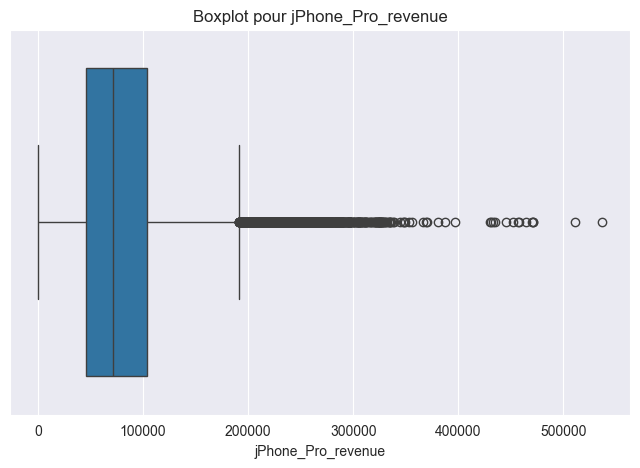

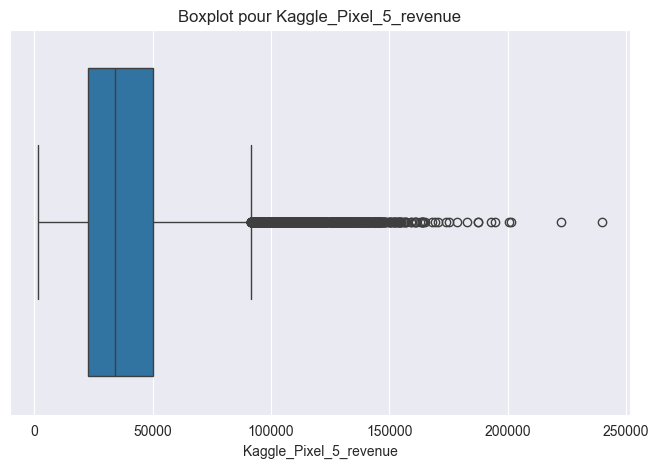

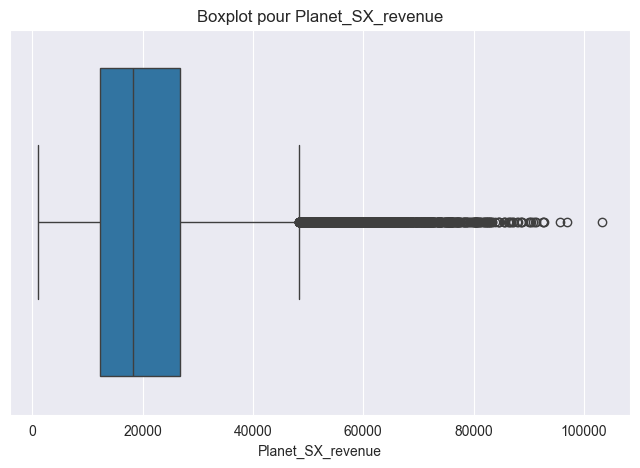

In [8]:
revenue_columns = ['jPhone_Pro_revenue', 'Kaggle_Pixel_5_revenue', 'Planet_SX_revenue']
for col in revenue_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=sales_data[col])
    plt.title(f"Boxplot pour {col}")
    plt.show()

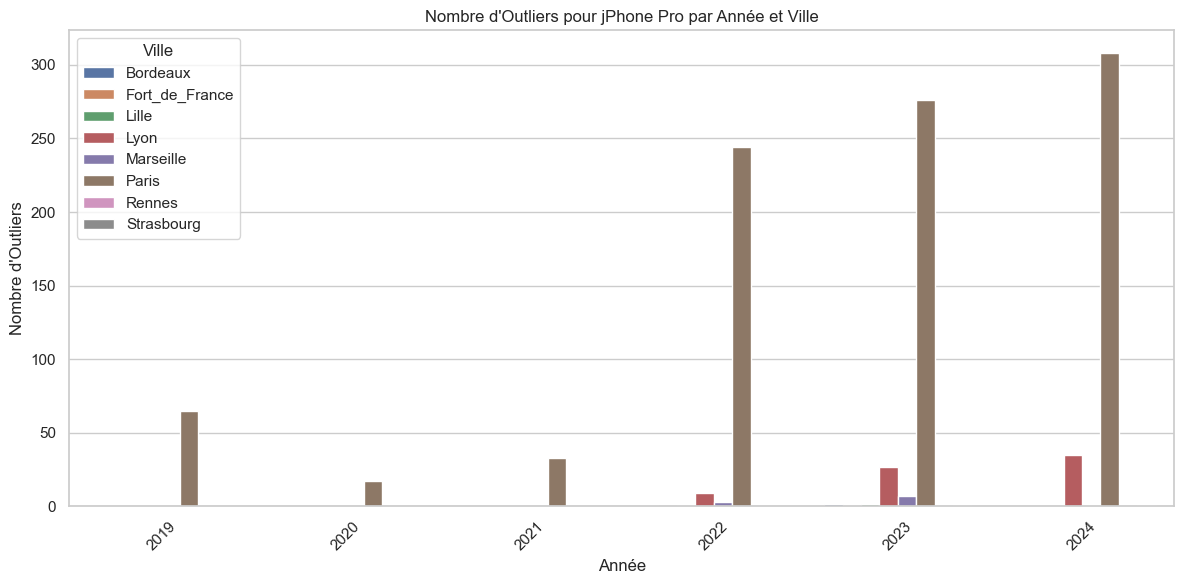

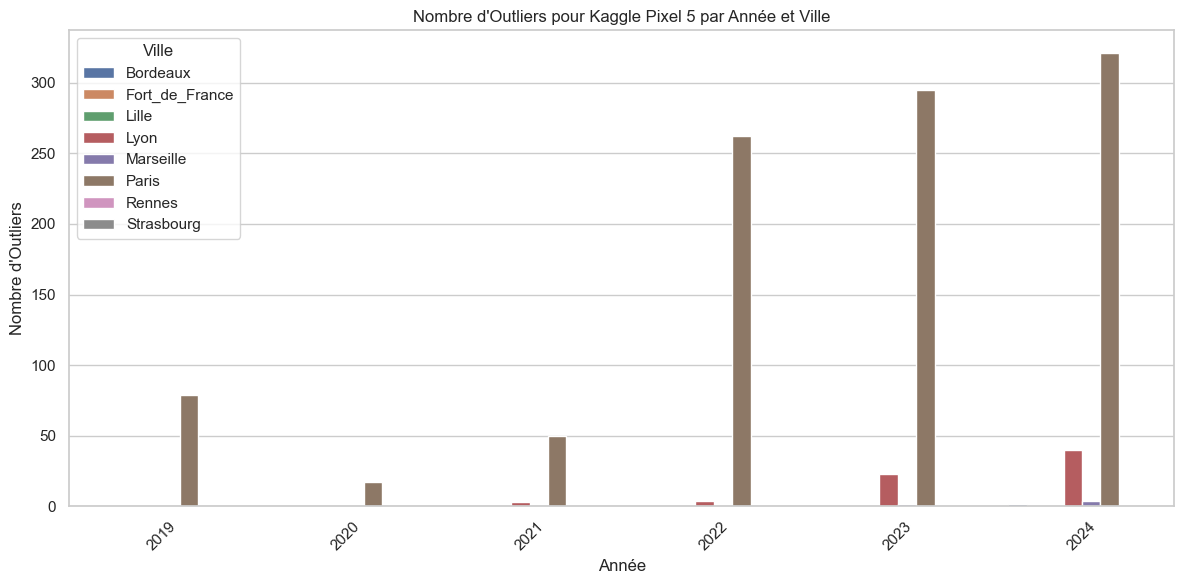

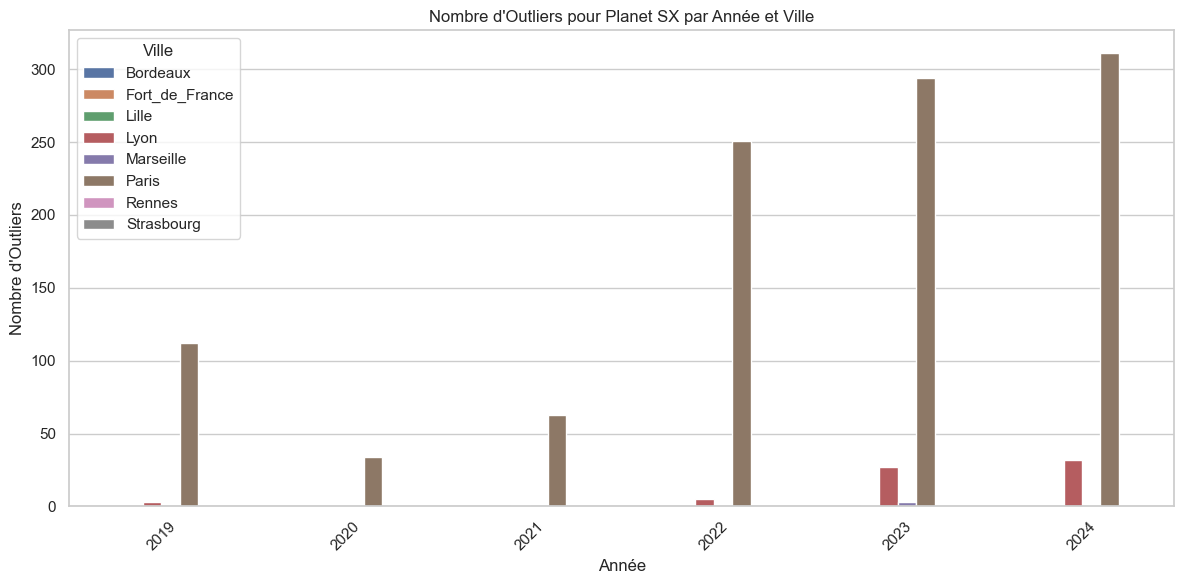

In [16]:
# Fonction pour détecter les outliers par année et par ville
def detect_outliers_by_year_and_city(data, column, group_columns):
    # Calcul des bornes IQR pour détecter les outliers
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Ajouter une colonne indiquant si une ligne est un outlier
    data['is_outlier'] = (data[column] < lower_bound) | (data[column] > upper_bound)
    
    # Compter les outliers par groupes
    outliers_by_group = data.groupby(group_columns)['is_outlier'].sum().reset_index()
    outliers_by_group.rename(columns={'is_outlier': 'outlier_count'}, inplace=True)
    
    return outliers_by_group

# Ajouter les colonnes nécessaires
sales_data['year'] = sales_data['date'].dt.year

# Exemple d'application pour les trois modèles
outliers_jphone = detect_outliers_by_year_and_city(sales_data, 'jPhone_Pro_revenue', ['year', 'city'])
outliers_kaggle = detect_outliers_by_year_and_city(sales_data, 'Kaggle_Pixel_5_revenue', ['year', 'city'])
outliers_planet = detect_outliers_by_year_and_city(sales_data, 'Planet_SX_revenue', ['year', 'city'])

# Visualisation des outliers
def plot_outliers(outliers_data, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=outliers_data, x='year', y='outlier_count', hue='city')
    plt.title(title)
    plt.xlabel('Année')
    plt.ylabel('Nombre d\'Outliers')
    plt.legend(title='Ville')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Tracer les graphiques pour chaque modèle
plot_outliers(outliers_jphone, "Nombre d'Outliers pour jPhone Pro par Année et Ville")
plot_outliers(outliers_kaggle, "Nombre d'Outliers pour Kaggle Pixel 5 par Année et Ville")
plot_outliers(outliers_planet, "Nombre d'Outliers pour Planet SX par Année et Ville")


## Traitement des Valeurs Aberrantes : Revenus des Modèles de Smartphones

Dans le cadre de l’analyse exploratoire, nous avons étudié les **valeurs aberrantes** (outliers) des colonnes de revenus pour les trois modèles de smartphones : `jPhone_Pro_revenue`, `Kaggle_Pixel_5_revenue`, et `Planet_SX_revenue`. Les étapes et observations suivantes ont été réalisées :

### Méthodologie :
1. **Identification des valeurs aberrantes :**
   - Les valeurs aberrantes ont été détectées en utilisant la méthode des **interquartiles (IQR)** pour chaque colonne de revenus :
     - Une valeur est considérée comme aberrante si elle se situe en dehors de l'intervalle suivant :
       \[
       [Q1 - 1.5 \times IQR, Q3 + 1.5 \times IQR]
       \]
   - Cela permet d’identifier les revenus qui s’écartent significativement de la majorité des observations.

2. **Calcul du pourcentage de valeurs aberrantes :**
   - Le pourcentage de valeurs aberrantes a été calculé pour chaque modèle afin d’évaluer l'ampleur de ces observations extrêmes.

3. **Étude des valeurs aberrantes par ville :**
   - Nous avons ensuite regroupé les données par ville pour identifier où ces valeurs aberrantes sont les plus fréquentes.

### Observations :
1. **Proportion de valeurs aberrantes par modèle :**
   - Une analyse des pourcentages montre que chaque modèle comporte des valeurs extrêmes, représentant une proportion notable des données. Ces valeurs peuvent refléter des ventes exceptionnelles ou des anomalies locales.

2. **Concentration des valeurs aberrantes à Paris :**
   - En regroupant par ville, nous avons observé que **Paris concentre une grande part des valeurs aberrantes**, ce qui est cohérent avec sa position de **plus grand point de vente**. En tant que capitale, Paris est une ville stratégique avec un volume élevé de transactions, ce qui peut expliquer cette concentration.

Cette analyse met en lumière les spécificités locales, notamment l'importance de Paris en tant que pôle majeur pour les ventes. Les valeurs aberrantes identifiées seront prises en compte dans les étapes suivantes, soit pour être conservées (si elles reflètent des phénomènes légitimes), soit pour être traitées si elles risquent de biaiser les résultats de l’analyse ou de la modélisation.


Statistiques descriptives des revenus :
       jPhone_Pro_revenue  Kaggle_Pixel_5_revenue  Planet_SX_revenue
count        17536.000000            17536.000000       17536.000000
mean         83936.020798            40660.578477       21849.599235
std          56814.570323            26725.140237       14188.877016
min              0.000000             1576.180000        1066.710000
25%          45792.737500            22487.270000       12359.370000
50%          70914.095000            34045.930000       18321.910000
75%         104083.890000            50064.302500       26768.745000
max         536859.730000           239736.500000      103250.710000


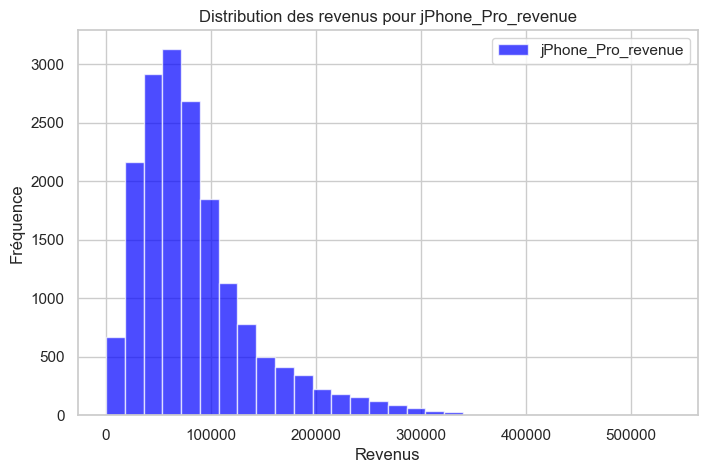

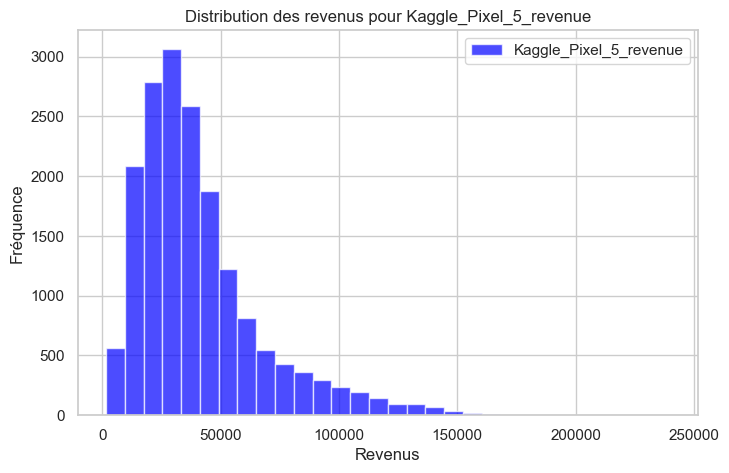

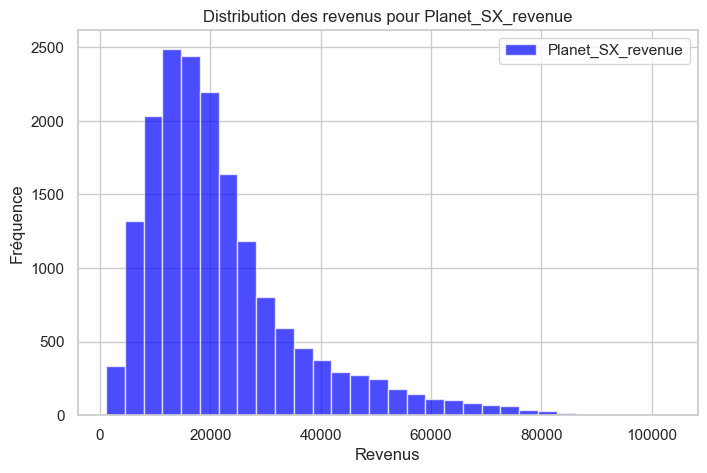

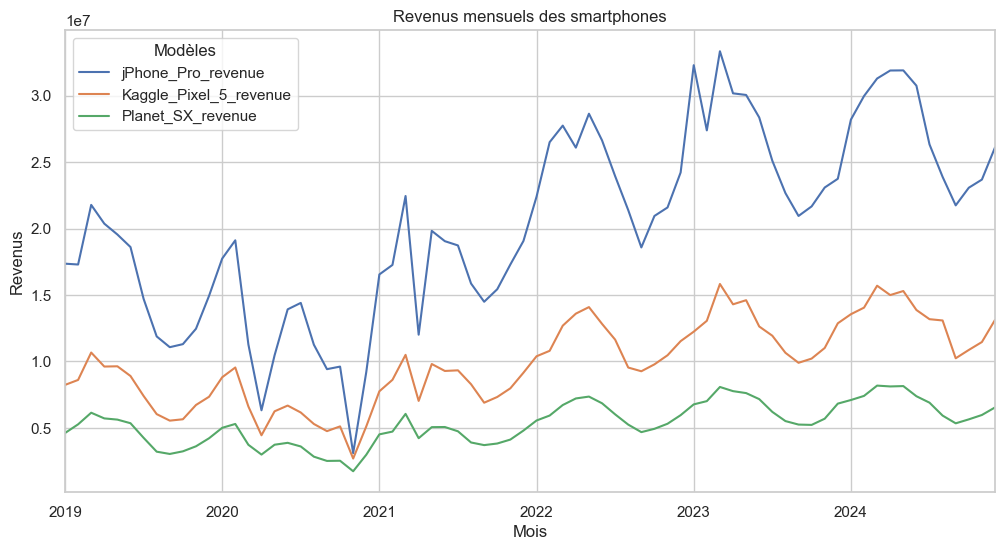

In [15]:
# 1. Assurez-vous que la colonne 'date' est au format datetime
sales_data['date'] = pd.to_datetime(sales_data['date'])

# 2. Statistiques descriptives des revenus
revenue_columns = ['jPhone_Pro_revenue', 'Kaggle_Pixel_5_revenue', 'Planet_SX_revenue']
stats = sales_data[revenue_columns].describe()

print("Statistiques descriptives des revenus :")
print(stats)

# 3. Distribution des revenus (Histogrammes)
for col in revenue_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(sales_data[col], bins=30, alpha=0.7, label=col, color='blue')
    plt.title(f"Distribution des revenus pour {col}")
    plt.xlabel('Revenus')
    plt.ylabel('Fréquence')
    plt.legend()
    plt.show()

# 4. Analyse temporelle : Agrégation mensuelle des revenus
# Ajouter la colonne 'month' pour regrouper par mois
sales_data['month'] = sales_data['date'].dt.to_period('M')

# Agréger les revenus mensuels
monthly_revenue = sales_data.groupby('month')[revenue_columns].sum()

# Afficher les revenus mensuels
monthly_revenue.plot(figsize=(12, 6), title='Revenus mensuels des smartphones')
plt.ylabel('Revenus')
plt.xlabel('Mois')
plt.legend(title='Modèles')
plt.grid(True)
plt.show()


C:\Users\etudiant\AppData\Local\Temp\ipykernel_64680\3835754659.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('year').apply(


Les 5 meilleurs jours par année :
    year       date  total_revenue
0   2019 2019-03-30  431939.340000
1   2019 2019-03-03  422471.730000
2   2019 2019-03-23  415793.810000
3   2019 2019-04-14  411637.210000
4   2019 2019-04-13  406380.230000
5   2020 2020-02-08  406618.780000
6   2020 2020-07-04  390246.170000
7   2020 2020-02-16  380454.110000
8   2020 2020-01-26  374590.650000
9   2020 2020-01-19  368023.675000
10  2021 2021-03-20  431258.552500
11  2021 2021-03-14  413980.690000
12  2021 2021-03-19  409096.811250
13  2021 2021-03-21  401103.738750
14  2021 2021-05-15  393991.730000
15  2022 2022-02-19  716918.960000
16  2022 2022-02-16  624244.620000
17  2022 2022-02-17  621418.560000
18  2022 2022-02-18  598671.690000
19  2022 2022-06-11  517175.956667
20  2023 2023-03-10  717422.260000
21  2023 2023-03-09  677407.890000
22  2023 2023-01-06  661832.970000
23  2023 2023-01-08  656483.310000
24  2023 2023-01-16  651252.580000
25  2024 2024-06-05  636182.840000
26  2024 2024-03-10  

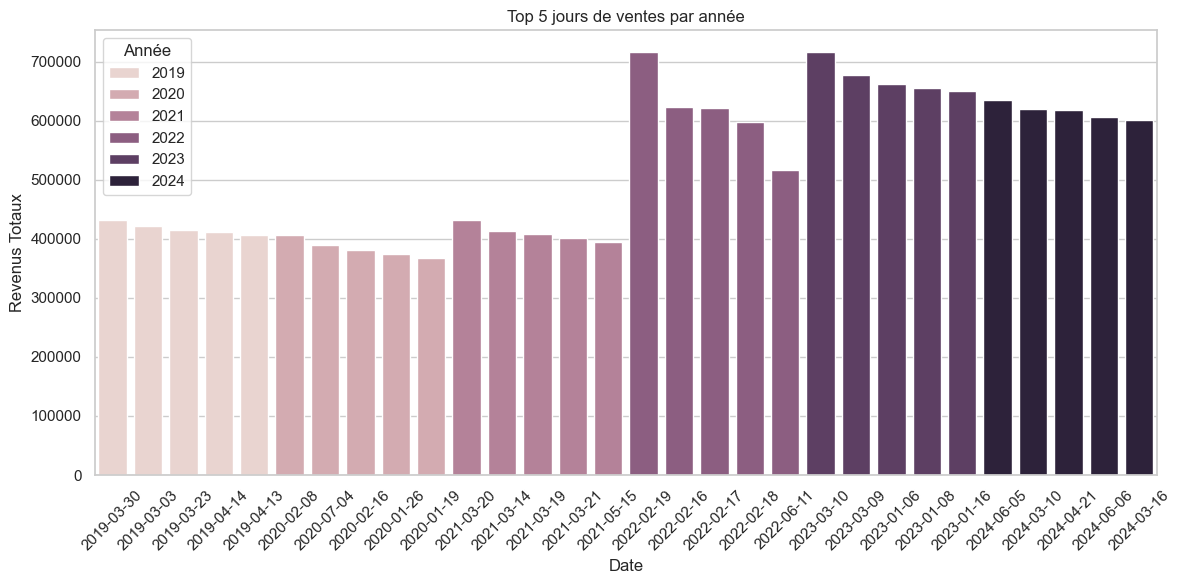

In [14]:
# Configurer l'affichage des graphiques
%matplotlib inline
sns.set_theme(style="whitegrid")

# Vérification des colonnes
sales_data.head()

# Assurez-vous que la colonne 'date' est au format datetime
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Ajouter une colonne 'year' pour regrouper par année
sales_data['year'] = sales_data['date'].dt.year

# Ajouter une colonne pour le total des revenus quotidiens
revenue_columns = ['jPhone_Pro_revenue', 'Kaggle_Pixel_5_revenue', 'Planet_SX_revenue']
sales_data['total_revenue'] = sales_data[revenue_columns].sum(axis=1)

# Identifier les 5 meilleurs jours de ventes pour chaque année
def get_top_days_by_year(df, revenue_column):
    return df.groupby('year').apply(
        lambda group: group.nlargest(5, revenue_column)
    ).reset_index(drop=True)

top_days = get_top_days_by_year(sales_data, 'total_revenue')

# Afficher les 5 meilleurs jours par année
print("Les 5 meilleurs jours par année :")
print(top_days[['year', 'date', 'total_revenue']])

# Visualiser les 5 meilleurs jours par année
def plot_top_days(top_days):
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=top_days,
        x='date',
        y='total_revenue',
        hue='year',
        dodge=False
    )
    plt.xticks(rotation=45)
    plt.title('Top 5 jours de ventes par année')
    plt.xlabel('Date')
    plt.ylabel('Revenus Totaux')
    plt.legend(title='Année', loc='upper left')
    plt.tight_layout()
    plt.show()

# Tracer les meilleurs jours
plot_top_days(top_days)

## Analyse des Revenus des Modèles de Smartphones

Nous avons étudié les revenus pour les trois modèles de smartphones (`jPhone_Pro_revenue`, `Kaggle_Pixel_5_revenue`, `Planet_SX_revenue`) en nous concentrant sur deux aspects clés : la **distribution des revenus** et leur **évolution mensuelle**. Voici les observations principales :

### 1. Distribution des Revenus
- La distribution des revenus pour chaque modèle a été analysée à l’aide d’histogrammes.
- **Observations clés** :
  - La distribution des revenus est **asymétrique** et **centrée à gauche**, indiquant que la majorité des revenus se concentrent sur des valeurs faibles ou moyennes.
  - Les valeurs les plus élevées (à droite de la distribution) représentent les **valeurs aberrantes** identifiées précédemment. Ces valeurs extrêmes correspondent probablement à des pics de ventes exceptionnels.

### 2. Revenus Mensuels
- L’évolution des revenus mensuels a été étudiée pour détecter des tendances saisonnières ou des anomalies.
- **Observations clés** :
  1. Les **début et fin d’année** sont les périodes les plus prolifiques en termes de revenus pour tous les modèles. Ces pics sont vraisemblablement liés aux **fêtes de fin d’année** ou aux **lancements de nouveaux modèles**.
  2. Un **creux marqué en Q4 2020** est observé, ce qui peut s'expliquer par l'impact de la pandémie de COVID-19, ayant entraîné des perturbations économiques globales et un ralentissement des ventes.
  3. Pour le **jPhone Pro**, les ventes augmentent régulièrement entre 2019 et 2023. Cependant, à partir de 2023, les revenus semblent se **stabiliser** à un niveau élevé, ce qui suggère une saturation ou une maturité du marché pour ce modèle.
  4. Les modèles **Kaggle Pixel 5** et **Planet SX** présentent des revenus **plus constants dans le temps**, avec des variations moins marquées que le `jPhone Pro`. Ces tendances pourraient refléter une base de clientèle plus stable ou une demande plus prévisible.

Cette analyse met en évidence des **patterns saisonniers forts**, suggérant que les périodes de fin d’année jouent un rôle crucial dans les performances commerciales. Les revenus élevés identifiés dans les queues des distributions pourraient correspondre à des opportunités ou anomalies à analyser plus en détail. L’évolution distincte des modèles, en particulier la croissance soutenue du `jPhone Pro` jusqu’en 2023, souligne l’importance de stratégies différenciées pour chaque produit. L’impact externe, comme celui du COVID-19 en Q4 2020, rappelle également l’importance de considérer les facteurs contextuels dans les analyses et la modélisation future.


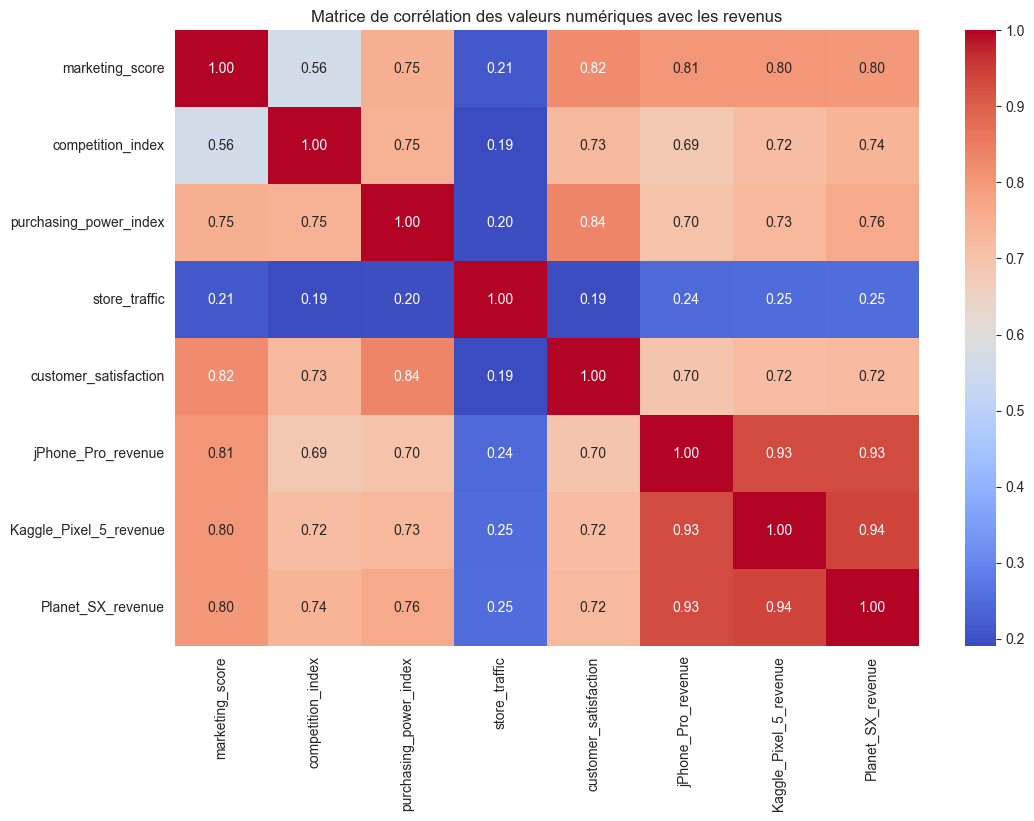

In [11]:
# Liste des colonnes numériques pour la corrélation
numeric_columns = ['marketing_score', 'competition_index', 'purchasing_power_index', 
                   'store_traffic', 'customer_satisfaction', 
                   'jPhone_Pro_revenue', 'Kaggle_Pixel_5_revenue', 'Planet_SX_revenue']

# Matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(sales_data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation des valeurs numériques avec les revenus")
plt.show()

## Analyse des Corrélations : Valeurs Numériques

Dans un premier temps, une **matrice de corrélation** a été générée à partir des variables numériques du dataset afin d’explorer les relations entre ces dernières et les revenus des modèles de smartphones (`jPhone_Pro_revenue`, `Kaggle_Pixel_5_revenue`, `Planet_SX_revenue`).

### Méthodologie :
1. Les variables numériques considérées incluent :
   - `marketing_score`
   - `competition_index`
   - `purchasing_power_index`
   - `store_traffic`
   - `customer_satisfaction`
   - Les trois colonnes de revenus des modèles.
2. Une **matrice de corrélation** a été calculée pour mesurer la force des relations linéaires entre les variables (avec un coefficient de corrélation variant entre -1 et 1).
3. Les résultats sont visualisés à l'aide d'une heatmap pour faciliter l'interprétation.

### Observations :
1. **Corrélations fortes avec les revenus des smartphones :**
   - Les variables suivantes présentent une **corrélation positive significative** avec les trois modèles de téléphones :
     - `marketing_score` : fortement corrélé avec les revenus (`~0.80` pour les trois modèles). Cela indique que les efforts marketing influencent directement les ventes.
     - `purchasing_power_index` : également bien corrélé (`~0.75`), ce qui reflète l'importance du pouvoir d'achat dans la performance commerciale.
     - `customer_satisfaction` : une autre variable clé, montrant que la satisfaction des clients est fortement liée aux revenus (`~0.70`).
     - `competition_index` : des corrélations légèrement plus faibles (`~0.69`), mais toujours significatives, suggérant que les dynamiques concurrentielles affectent les performances.
   - Ces variables apparaissent comme des **facteurs prédictifs potentiels** dans l’explication des revenus.

2. **Faibles corrélations pour `store_traffic` :**
   - La variable `store_traffic` présente une corrélation plus faible avec les revenus (`~0.20-0.25`). Cela peut indiquer que le trafic seul n'est pas un indicateur direct des ventes et pourrait nécessiter des interactions avec d'autres variables (comme le marketing ou la satisfaction).

3. **Relations entre les variables explicatives :**
   - On observe une **corrélation élevée** entre certaines variables explicatives :
     - Par exemple, `marketing_score` et `customer_satisfaction` sont très corrélés (`~0.82`), ce qui peut refléter des interactions logiques (une bonne campagne marketing améliore la satisfaction client).
     - `purchasing_power_index` et `competition_index` montrent également une forte corrélation (`~0.75`).

### Conclusion :
- **Variables influentes :** Les variables `marketing_score`, `purchasing_power_index`, `customer_satisfaction`, et `competition_index` jouent un rôle clé dans la performance des trois modèles de smartphones, comme le montrent leurs fortes corrélations avec les revenus.
- **Relations à surveiller :** Certaines variables explicatives présentent des corrélations élevées entre elles, ce qui peut indiquer une redondance ou un risque de multicolinéarité à prendre en compte dans les modèles prédictifs.
- **Faibles corrélations :** Des variables comme `store_traffic` pourraient avoir un impact indirect ou nécessiter des interactions pour mieux expliquer les revenus.

Cette analyse guide le choix des variables pertinentes pour les étapes de modélisation, en se concentrant sur les facteurs ayant le plus d’impact direct sur les revenus.


In [12]:
# Encodage complet sans exclure de catégories
encoded_data = pd.get_dummies(sales_data[['weather_condition', '5g_phase', 'public_transport', 'date']], drop_first=False)

# Colonnes des revenus à analyser
revenue_columns = ['jPhone_Pro_revenue', 'Kaggle_Pixel_5_revenue', 'Planet_SX_revenue']

# Calcul des corrélations entre les variables encodées et les revenus
correlation_matrix = pd.DataFrame({model: encoded_data.corrwith(sales_data[model]) for model in revenue_columns})

# Affichage sous forme de matrice
print("Matrice de corrélation des valeurs catégoriques avec les revenus :")
print(correlation_matrix)

Matrice de corrélation des valeurs catégoriques avec les revenus :
                            jPhone_Pro_revenue  Kaggle_Pixel_5_revenue  \
date                                  0.352922                0.340212   
weather_condition_Bad                -0.025512               -0.031701   
weather_condition_Good                0.019193                0.015226   
weather_condition_Moderate            0.002936                0.011913   
5g_phase_Early-5G                    -0.238567               -0.229125   
5g_phase_Mature-5G                    0.332677                0.315623   
5g_phase_Mid-5G                       0.012193                0.001256   
5g_phase_Pre-5G                      -0.192799               -0.171271   
public_transport_Good                 0.010397                0.004883   
public_transport_Hub                 -0.156336               -0.157089   
public_transport_Limited              0.050957                0.053400   
public_transport_Poor                 0.14844

## Analyse des Corrélations : Variables Catégoriques

Après avoir étudié les corrélations des variables numériques avec les revenus, nous avons également examiné les **variables catégoriques** afin d’évaluer leur impact potentiel sur les performances des modèles de smartphones (`jPhone_Pro_revenue`, `Kaggle_Pixel_5_revenue`, `Planet_SX_revenue`).

### Méthodologie :
1. **Encodage des variables catégoriques :**
   - Les variables catégoriques ont été transformées en variables numériques à l’aide de l’encodage One-Hot Encoding, permettant ainsi de calculer les corrélations.
   - Les variables prises en compte sont :
     - `weather_condition` : représentant les conditions météorologiques (`Good`, `Bad`, `Moderate`).
     - `5g_phase` : correspondant aux phases de déploiement de la 5G (`Early`, `Mid`, `Mature`, `Pre-5G`).
     - `public_transport` : indiquant l’état des transports publics (`Good`, `Limited`, `Poor`, `Hub`).

2. **Calcul des corrélations :**
   - Une matrice de corrélation a été générée entre les variables catégoriques encodées et les revenus des trois modèles.


### Observations :
1. **Impact des conditions météorologiques (`weather_condition`) :**
   - Les corrélations entre les conditions météorologiques et les revenus sont **faibles** pour tous les modèles. Par exemple :
     - Les conditions météorologiques "Good" montrent une corrélation légèrement positive (~0.01), mais leur impact reste marginal.
     - Les conditions "Bad" ont une corrélation légèrement négative (~-0.02), suggérant un effet limité sur les ventes.

2. **Impact des phases 5G (`5g_phase`) :**
   - Les phases de déploiement de la 5G montrent des **corrélations significatives** :
     - La phase `Mature-5G` est positivement corrélée avec les revenus pour les trois modèles (`~0.27 à 0.39`), reflétant une adoption plus forte dans les zones bien couvertes.
     - En revanche, les phases `Early-5G` et `Pre-5G` présentent des corrélations négatives (~-0.19 à -0.25), suggérant que les zones moins avancées en termes de couverture 5G sont moins rentables.

3. **Impact des transports publics (`public_transport`) :**
   - Les états des transports publics influencent différemment les revenus :
     - Les zones où les transports sont jugés `Poor` montrent une corrélation positive (~0.14 à 0.15), peut-être en raison d'une plus forte dépendance à d'autres moyens de communication comme les smartphones.
     - En revanche, les zones qualifiées de `Hub` (zones centrales) ont des corrélations négatives (~-0.15 à -0.16), ce qui pourrait indiquer une saturation du marché dans ces zones.


### Conclusion :
1. **Faible impact global des variables catégoriques :**
   - Bien que certaines relations intéressantes soient observées (notamment pour la phase `Mature-5G` et l’état `Poor` des transports), les corrélations restent globalement faibles pour les variables catégoriques.

2. **Insights spécifiques :**
   - Les phases avancées de la 5G (comme `Mature-5G`) constituent un facteur important pour expliquer les variations des revenus.
   - Les conditions locales comme l’état des transports publics (`Poor` ou `Hub`) peuvent influencer indirectement les ventes, mais leur impact reste limité.

Ces observations seront prises en compte pour évaluer l’importance de ces variables dans les modèles prédictifs. Les faibles corrélations suggèrent que certaines variables catégoriques pourraient être exclues ou nécessiter des interactions avec d’autres variables pour mieux expliquer les revenus.


## Justification du Choix des Features

Pour développer un modèle de prévision des revenus des modèles de smartphones (`jPhone_Pro_revenue`, `Kaggle_Pixel_5_revenue`, `Planet_SX_revenue`), nous avons soigneusement sélectionné les variables explicatives (features) en nous basant sur les analyses exploratoires effectuées précédemment. Voici les critères et justifications pour le choix des variables :


### 1. Critères de Sélection
1. **Corrélation avec les revenus :**
   - Nous avons pris en compte les variables présentant une corrélation significative (positive ou négative) avec les revenus des smartphones.
2. **Pertinence métier :**
   - Les variables doivent avoir une logique métier claire pour expliquer les revenus, comme le marketing, la satisfaction client ou les phases de déploiement de la 5G.
3. **Éviter la multicolinéarité :**
   - Les variables très corrélées entre elles ont été surveillées pour éviter des redondances ou des biais dans le modèle.
4. **Données temporelles :**
   - Les tendances observées (pics de fin d’année, creux pendant la pandémie) justifient l’inclusion de variables temporelles.


### 2. Variables Sélectionnées

#### **a) Variables Numériques**
Ces variables ont montré des corrélations modérées à fortes avec les revenus :
- **`marketing_score` :** Corrélé fortement (~0.80) avec tous les modèles, cette variable est un indicateur clé des efforts marketing qui influencent directement les ventes.
- **`customer_satisfaction` :** Corrélé à ~0.70, ce score reflète l’impact de la satisfaction client sur la performance commerciale.
- **`purchasing_power_index` :** Corrélé à ~0.75, cette variable reflète la capacité d’achat des consommateurs, un facteur essentiel pour les ventes.
- **`competition_index` :** Corrélé à ~0.69, il indique l’influence de la concurrence sur les revenus.
- **`store_traffic` :** Bien que la corrélation soit plus faible (~0.20-0.25), cette variable est incluse pour capturer des effets potentiels liés au trafic en magasin.

#### **b) Variables Catégoriques (encodées)**
Des variables catégoriques encodées en one-hot encoding ont été sélectionnées pour inclure des facteurs contextuels :
- **`5g_phase` :**
  - La phase `Mature-5G` montre une forte corrélation positive (~0.27 à 0.39), reflétant une adoption accrue dans les zones bien couvertes.
  - Les phases `Early-5G` et `Pre-5G`, bien qu’ayant des corrélations négatives (~-0.19 à -0.25), sont incluses pour capturer les variations dans les zones moins avancées.
- **`public_transport` :**
  - Les catégories `Poor` (corrélation positive ~0.14 à 0.15) et `Hub` (corrélation négative ~-0.15) permettent d’expliquer des variations locales dans les revenus.
- **`weather_condition` :**
  - Les catégories `Good` et `Bad` sont conservées malgré des corrélations faibles, car elles peuvent avoir un impact indirect sur les revenus (par exemple, un effet saisonnier).
  
### **c) Variables Temporelles**
   **`date`** : Étant donné que le modèle de prédiction est journalier, la variable date a été créée comme feature temporelle principale. Cette approche permet de capturer les variations spécifiques à chaque trimestre tout en tenant compte des tendances à long terme grâce à la distinction entre les années et les trimestres (par exemple, 2023Q1 pour le 1er trimestre 2023). Cela facilite également l’intégration de patterns saisonniers récurrents, tels que des pics ou des creux liés aux cycles économiques ou aux événements spécifiques à certaines périodes de l'année.


### 3. Variables Exclues
- **`tech_event` :** Cette variable n’a pas été traitée car elle contient trop peu de données pour être pertinente.
- **Certaines catégories de `public_transport` et `weather_condition` :** Les catégories avec des corrélations proches de 0 ont été exclues pour éviter d’ajouter du bruit au modèle.


### Conclusion
Le choix des features reflète une combinaison de **corrélations statistiques**, de **logique métier**, et de **pertinence temporelle**. Ces variables fourniront une base solide pour construire un modèle prédictif robuste et interprétable. Les étapes suivantes incluront la préparation des données et la validation du modèle à l'aide de ces features sélectionnées.
